In [398]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(palette="tab10")
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

In [399]:
row_order = [
    "Q-Former LoRA (cross-attn, FlanT5-XL) ",
    "Q-Former LoRA (self-attn, FlanT5-XL)  ",
    "Q-Former LoRA (ffn, FlanT5-XL)        ",
    "Q-Former LoRA (all, FlanT5-XL)        ",
    "LLM LoRA (attn, FlanT5-XL)            ",
    "LLM LoRA (ffn, FlanT5-XL)             ",
    "LLM LoRA (all, FlanT5-XL)             ",
    "Q-Former and LLM LoRA (all, FlanT5-XL)",
    # "Q-Former (self-attn QVO, FlanT5-XL)   ",
    # "Q-Former (cross-attn QVO, FlanT5-XL)  ",
    # "Q-Former (cross-attn QV, FlanT5-XL)   ",
]
row_order = [x.strip() for x in row_order]
custom_sort_value = {}

for idx, row in enumerate(row_order):
    custom_sort_value[row] = idx

custom_sort_value

{'Q-Former LoRA (cross-attn, FlanT5-XL)': 0,
 'Q-Former LoRA (self-attn, FlanT5-XL)': 1,
 'Q-Former LoRA (ffn, FlanT5-XL)': 2,
 'Q-Former LoRA (all, FlanT5-XL)': 3,
 'LLM LoRA (attn, FlanT5-XL)': 4,
 'LLM LoRA (ffn, FlanT5-XL)': 5,
 'LLM LoRA (all, FlanT5-XL)': 6,
 'Q-Former and LLM LoRA (all, FlanT5-XL)': 7}

In [400]:
def rename_method(name):
    name = name.replace(', FlanT5-XL', '').replace('LoRA ', '').replace(' (', '\n').replace(')', '').replace(' and', '\nand')
    name = name.replace('attn', 'Attn').replace('self', 'Self').replace('cross', 'Cross').replace('ffn', 'FFN').replace('all', 'All')
    return name

In [401]:
dataset = 'iconqa' # 'scienceqa' # 

# Loss over time for same component

In [359]:
df = pd.read_csv(f'{dataset}/loss_hist.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
5,Q-Former\nCross-Attn,"[0.7435, 0.21, 0.1951, 0.1472, 0.334, 0.2068, ...","[0.7435, 0.21, 0.1951, 0.1472, 0.334, 0.2068, ...","[0.7435, 0.21, 0.1951, 0.1472, 0.334, 0.2068, ...","[0.7435, 0.21, 0.1951, 0.1472, 0.334, 0.2068, ..."
4,Q-Former\nSelf-Attn,"[0.7124, 0.2317, 0.1909, 0.1257, 0.3457, 0.203...","[0.7124, 0.2317, 0.1909, 0.1257, 0.3457, 0.203...","[0.7124, 0.2317, 0.1909, 0.1257, 0.3457, 0.203...","[0.7124, 0.2317, 0.1909, 0.1257, 0.3457, 0.203..."
3,Q-Former\nFFN,"[0.7004, 0.2161, 0.1802, 0.1251, 0.3446, 0.211...","[0.7004, 0.2161, 0.1802, 0.1251, 0.3446, 0.211...","[0.7004, 0.2036, 0.1702, 0.1237, 0.2714, 0.211...","[0.7004, 0.2161, 0.1802, 0.1251, 0.3446, 0.211..."
6,Q-Former\nAll,"[0.7335, 0.2075, 0.1997, 0.1348, 0.3379, 0.247...","[0.7335, 0.2081, 0.1781, 0.1402, 0.2864, 0.209...","[0.7335, 0.2075, 0.1997, 0.1348, 0.3379, 0.247...","[0.7335, 0.2075, 0.1997, 0.1348, 0.3379, 0.247..."
1,LLM\nAttn,"[0.7223, 0.2497, 0.2203, 0.1119, 0.2821, 0.225...","[0.704, 0.2716, 0.1871, 0.1251, 0.3121, 0.2337...","[0.7194, 0.2532, 0.2272, 0.1145, 0.3076, 0.241...","[0.7105, 0.2472, 0.2146, 0.1434, 0.282, 0.2245..."
0,LLM\nFFN,"[0.6991, 0.3073, 0.1862, 0.107, 0.3492, 0.2191...","[0.7105, 0.3305, 0.236, 0.1027, 0.391, 0.2135,...","[0.7188, 0.2298, 0.1928, 0.1648, 0.3075, 0.207...","[0.7184, 0.2349, 0.2304, 0.1273, 0.3047, 0.242..."
2,LLM\nAll,"[0.7395, 0.2336, 0.2247, 0.1168, 0.3086, 0.212...","[0.7194, 0.264, 0.1849, 0.1432, 0.3459, 0.2349...","[0.7024, 0.2807, 0.2094, 0.1008, 0.3577, 0.221...","[0.7242, 0.2262, 0.1775, 0.1326, 0.3464, 0.219..."
7,Q-Former\nand LLM\nAll,"[0.7279, 0.1998, 0.195, 0.1487, 0.3211, 0.1427...","[0.7283, 0.1762, 0.2186, 0.1432, 0.2765, 0.169...","[0.7213, 0.1949, 0.1685, 0.1297, 0.2959, 0.191...","[0.7116, 0.1824, 0.1911, 0.1605, 0.3502, 0.148..."


In [360]:
from scipy import interpolate, ndimage

def plot_loss_for_all_r(sub_df, row_id, window_size):
    loss_r1 = ast.literal_eval(sub_df.at[row_id, "r = 1"])
    loss_r2 = ast.literal_eval(sub_df.at[row_id, "r = 2"])
    loss_r4 = ast.literal_eval(sub_df.at[row_id, "r = 4"])
    loss_r8 = ast.literal_eval(sub_df.at[row_id, "r = 8"])

    smooth_r1 = ndimage.gaussian_filter1d(loss_r1, window_size)
    smooth_r2 = ndimage.gaussian_filter1d(loss_r2, window_size)
    smooth_r4 = ndimage.gaussian_filter1d(loss_r4, window_size)
    smooth_r8 = ndimage.gaussian_filter1d(loss_r8, window_size)

    smooth_r1_df = pd.DataFrame({'iter': range(len(smooth_r1)), 'loss': smooth_r1, 'rank':['1']*len(smooth_r1)})
    smooth_r2_df = pd.DataFrame({'iter': range(len(smooth_r2)), 'loss': smooth_r2, 'rank':['2']*len(smooth_r2)})
    smooth_r4_df = pd.DataFrame({'iter': range(len(smooth_r4)), 'loss': smooth_r4, 'rank':['4']*len(smooth_r4)})
    smooth_r8_df = pd.DataFrame({'iter': range(len(smooth_r8)), 'loss': smooth_r8, 'rank':['8']*len(smooth_r8)})

    data = pd.concat([
        smooth_r1_df,
        smooth_r2_df,
        smooth_r4_df,
        smooth_r8_df
        ], axis=0)

    sns.lineplot(data=data, x='iter', y="loss", hue="rank")

    method = sub_df.at[row_id, 'method']
    plt.title(f'{method}')

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

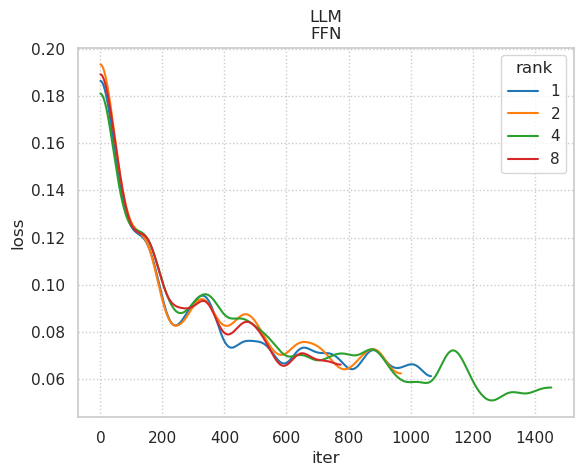

In [361]:
plot_loss_for_all_r(sub_df, 0, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

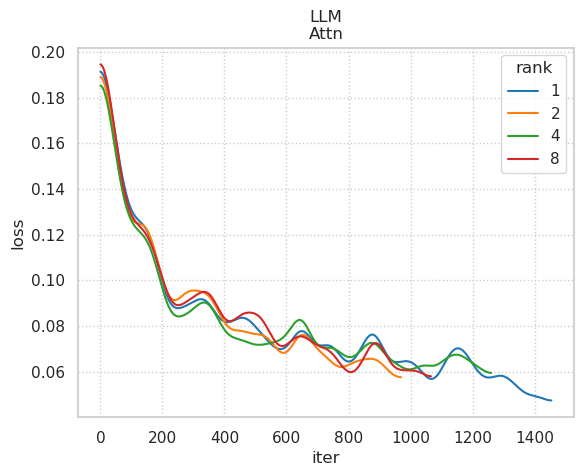

In [362]:
plot_loss_for_all_r(sub_df, 1, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

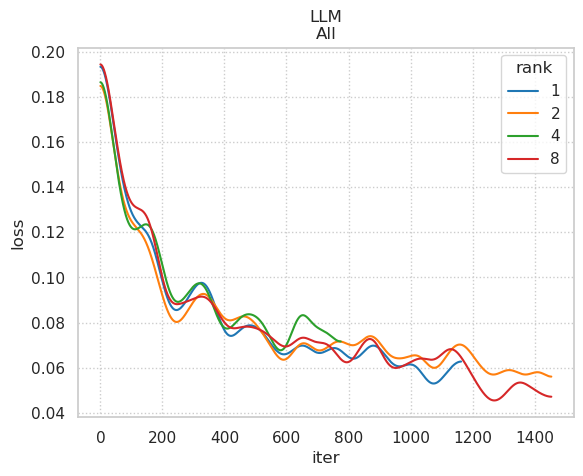

In [363]:
plot_loss_for_all_r(sub_df, 2, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

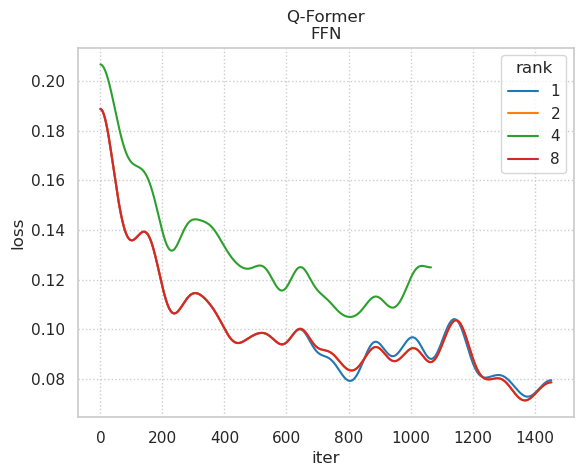

In [364]:
plot_loss_for_all_r(sub_df, 3, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

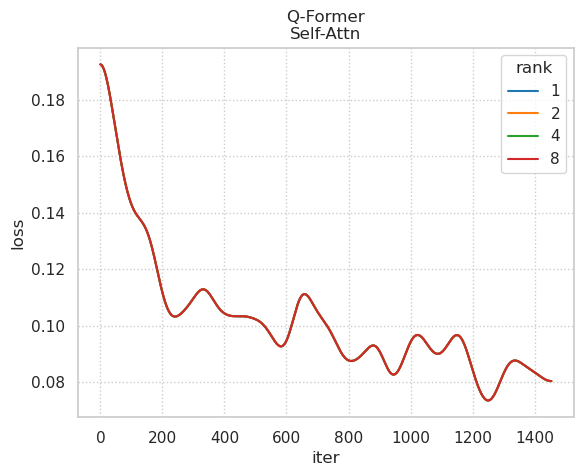

In [365]:
plot_loss_for_all_r(sub_df, 4, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

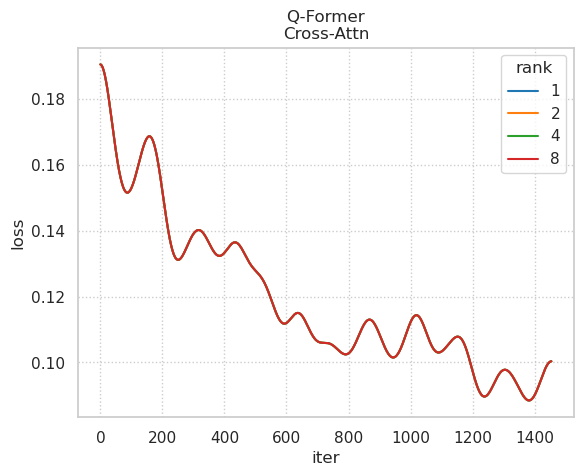

In [366]:
plot_loss_for_all_r(sub_df, 5, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

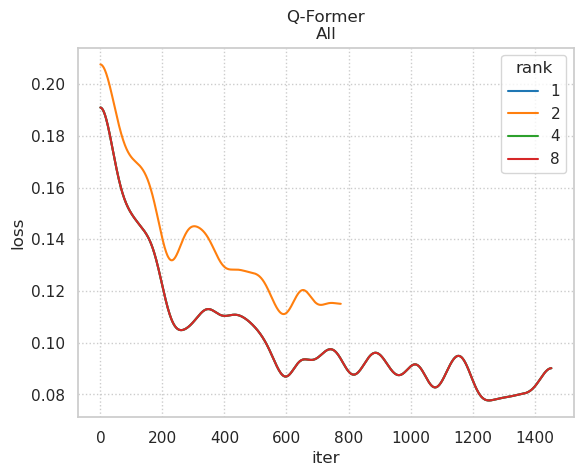

In [367]:
plot_loss_for_all_r(sub_df, 6, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


KeyboardInterrupt: 

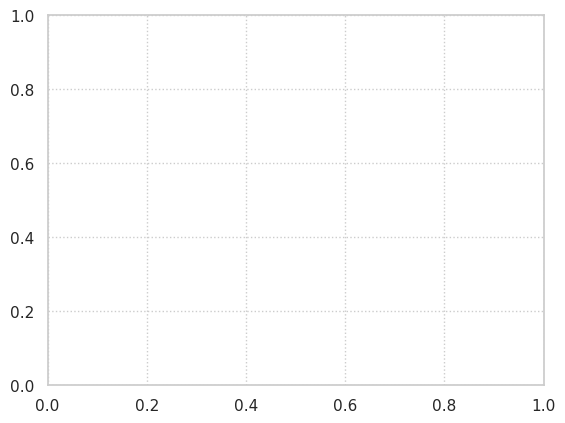

In [368]:
plot_loss_for_all_r(sub_df, 7, 33)

# Loss over time for same rank

In [ ]:
df = pd.read_csv(f'{dataset}/loss_hist.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,Q-Former\nSelf-Attn,"[0.2207, 0.1499, 0.1777, 0.1229, 0.12, 0.0452,...","[0.2207, 0.1499, 0.1777, 0.1229, 0.12, 0.0452,...","[0.2207, 0.1855, 0.1669, 0.0937, 0.1488, 0.049...","[0.2207, 0.1499, 0.1777, 0.1229, 0.12, 0.0452,..."
5,Q-Former\nCross-Attn,"[0.2083, 0.1379, 0.1765, 0.0972, 0.1229, 0.046...","[0.2083, 0.1616, 0.2149, 0.0923, 0.1291, 0.049...","[0.2083, 0.1379, 0.1765, 0.0972, 0.1229, 0.046...","[0.2083, 0.1379, 0.1765, 0.0972, 0.1229, 0.046..."
3,Q-Former\nFFN,"[0.2295, 0.1339, 0.1704, 0.0791, 0.1271, 0.043...","[0.2295, 0.1339, 0.1704, 0.0791, 0.1271, 0.043...","[0.2295, 0.1339, 0.1704, 0.0791, 0.1271, 0.043...","[0.2295, 0.1339, 0.1704, 0.0791, 0.1271, 0.043..."
6,Q-Former\nAll,"[0.2433, 0.1378, 0.1676, 0.125, 0.1292, 0.0475...","[0.2433, 0.1378, 0.1676, 0.125, 0.1292, 0.0475...","[0.2433, 0.1378, 0.1676, 0.125, 0.1292, 0.0475...","[0.2433, 0.1378, 0.1676, 0.125, 0.1292, 0.0475..."
1,LLM\nAttn,"[0.2394, 0.1274, 0.1313, 0.1086, 0.1423, 0.057...","[0.221, 0.149, 0.1634, 0.0836, 0.1367, 0.051, ...","[0.2467, 0.15, 0.1737, 0.078, 0.1414, 0.0486, ...","[0.2451, 0.1482, 0.1613, 0.136, 0.1171, 0.0473..."
0,LLM\nFFN,"[0.2437, 0.1342, 0.1701, 0.1755, 0.1314, 0.052...","[0.2472, 0.1628, 0.1447, 0.1174, 0.1256, 0.041...","[0.2428, 0.1389, 0.1275, 0.1507, 0.1255, 0.047...","[0.2165, 0.1376, 0.1535, 0.0659, 0.1308, 0.046..."
2,LLM\nAll,"[0.2185, 0.1598, 0.1388, 0.069, 0.1234, 0.0407...","[0.2421, 0.1484, 0.1616, 0.0975, 0.1291, 0.049...","[0.2334, 0.1187, 0.1774, 0.1301, 0.1221, 0.042...","[0.2047, 0.1421, 0.1705, 0.0805, 0.1267, 0.039..."
7,Q-Former\nand LLM\nAll,"[0.2424, 0.1573, 0.1535, 0.1062, 0.1225, 0.043...","[0.2302, 0.1708, 0.2173, 0.0773, 0.1288, 0.043...","[0.242, 0.1736, 0.1802, 0.1149, 0.1158, 0.0471...","[0.2171, 0.1627, 0.1578, 0.1091, 0.1205, 0.044..."


In [ ]:
from scipy import interpolate, ndimage

def average_with_window(arr, window_size):
    averages = []
    for i in range(0, len(arr), window_size):
        window = arr[i:i+window_size]
        if len(window) == window_size:
            averages.append(sum(window) / window_size)
    return averages

def plot_loss_for_all_components(sub_df, methods, rank, window_size):
    df_list = []

    # methods = list(sub_df['method'])

    for method in methods:
        loss_hist = ast.literal_eval(sub_df.loc[sub_df['method'] == method, f"r = {rank}"].tolist()[0])
        # smooth = ndimage.gaussian_filter1d(loss_hist, window_size)
        smooth = average_with_window(loss_hist, window_size)
        smooth_df = pd.DataFrame({'iter': range(len(smooth)), 'loss': smooth, 'method':[f'{method}']*len(smooth)})
        df_list.append(smooth_df)

    data = pd.concat(df_list, axis=0)

    sns.lineplot(data=data, x='iter', y="loss", hue="method")
    plt.legend(title='Component')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.title(f'r = {rank}')

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

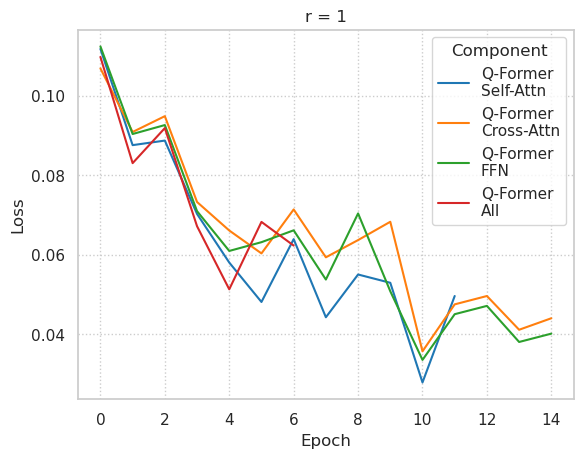

In [ ]:
plot_loss_for_all_components(
    sub_df, 
    ['Q-Former\nSelf-Attn', 'Q-Former\nCross-Attn', 'Q-Former\nFFN', 'Q-Former\nAll'],
    1, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

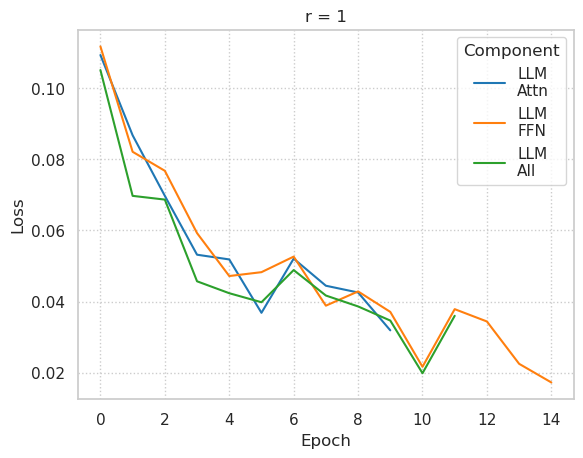

In [ ]:
plot_loss_for_all_components(
    sub_df, 
    ['LLM\nAttn', 'LLM\nFFN', 'LLM\nAll'],
    1,
    33
)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

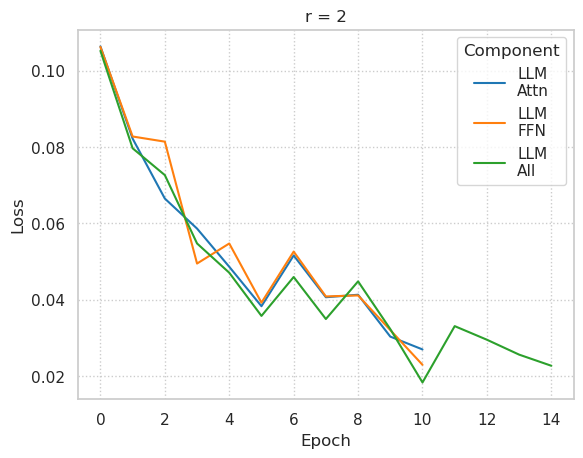

In [ ]:
plot_loss_for_all_components(
    sub_df,
    ['LLM\nAttn', 'LLM\nFFN', 'LLM\nAll'],
    2,
    33
)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

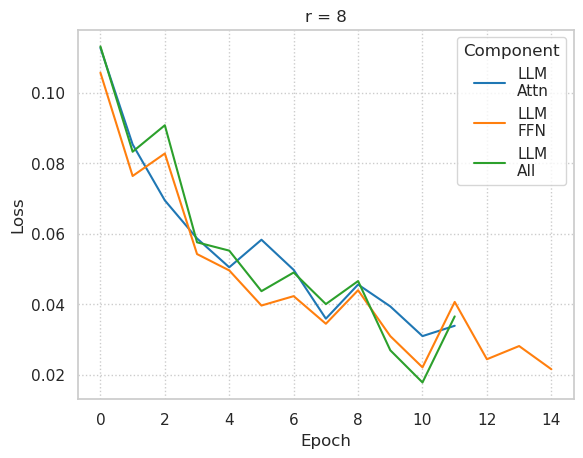

In [ ]:
plot_loss_for_all_components(
    sub_df, 
    ['LLM\nAttn', 'LLM\nFFN', 'LLM\nAll'],
    8, 33)

# Loss & Val Acc per epoch

In [402]:
df = pd.read_csv(f'{dataset}/loss_per_epoch.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
loss_df = df[df['method'].isin(row_order)]
# sort methods by param count ascending
loss_df = loss_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
# rename methods
loss_df['method'] = loss_df['method'].transform(lambda x: rename_method(x))
loss_df

,method,r = 1,r = 2,r = 4,r = 8
5,Q-Former\nCross-Attn,"[0.168, 0.156, 0.14, 0.132, 0.139, 0.123, 0.11...","[0.168, 0.156, 0.14, 0.132, 0.139, 0.123, 0.11...","[0.168, 0.156, 0.14, 0.132, 0.139, 0.123, 0.11...","[0.168, 0.156, 0.14, 0.132, 0.139, 0.123, 0.11..."
4,Q-Former\nSelf-Attn,"[0.164, 0.131, 0.12, 0.112, 0.105, 0.101, 0.09...","[0.164, 0.131, 0.12, 0.112, 0.105, 0.101, 0.09...","[0.164, 0.131, 0.12, 0.112, 0.105, 0.101, 0.09...","[0.164, 0.131, 0.12, 0.112, 0.105, 0.101, 0.09..."
3,Q-Former\nFFN,"[0.163, 0.133, 0.12, 0.112, 0.105, 0.101, 0.09...","[0.163, 0.133, 0.12, 0.112, 0.105, 0.101, 0.09...","[0.187, 0.154, 0.141, 0.136, 0.131, 0.125, 0.1...","[0.163, 0.133, 0.12, 0.112, 0.105, 0.101, 0.09..."
6,Q-Former\nAll,"[0.166, 0.133, 0.121, 0.112, 0.106, 0.101, 0.0...","[0.186, 0.155, 0.142, 0.135, 0.13, 0.125, 0.12...","[0.166, 0.133, 0.121, 0.112, 0.106, 0.101, 0.0...","[0.166, 0.133, 0.121, 0.112, 0.106, 0.101, 0.0..."
1,LLM\nAttn,"[0.159, 0.117, 0.1, 0.09, 0.084, 0.079, 0.076,...","[0.155, 0.114, 0.097, 0.088, 0.081, 0.076, 0.0...","[0.154, 0.113, 0.094, 0.087, 0.082, 0.077, 0.0...","[0.159, 0.117, 0.1, 0.091, 0.084, 0.079, 0.076..."
0,LLM\nFFN,"[0.154, 0.116, 0.098, 0.089, 0.082, 0.079, 0.0...","[0.156, 0.113, 0.096, 0.087, 0.081, 0.078, 0.0...","[0.153, 0.115, 0.1, 0.09, 0.082, 0.079, 0.075,...","[0.156, 0.117, 0.099, 0.088, 0.082, 0.077, 0.0..."
2,LLM\nAll,"[0.158, 0.115, 0.099, 0.088, 0.082, 0.079, 0.0...","[0.151, 0.112, 0.095, 0.087, 0.08, 0.077, 0.07...","[0.151, 0.114, 0.097, 0.089, 0.082, 0.077, 0.0...","[0.158, 0.115, 0.099, 0.089, 0.083, 0.077, 0.0..."
7,Q-Former\nand LLM\nAll,"[0.155, 0.129, 0.12, 0.113, 0.11, 0.103, 0.1, ...","[0.154, 0.131, 0.118, 0.237, 0.105, 0.101, 0.0...","[0.155, 0.126, 0.117, 0.111, 0.104, 0.099, 0.0...","[0.154, 0.13, 0.123, 0.112, 0.107, 0.101, 0.09..."


In [403]:
df = pd.read_csv(f'{dataset}/val_acc_per_epoch.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
val_acc_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
val_acc_df = val_acc_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
# rename methods
val_acc_df['method'] = val_acc_df['method'].transform(lambda x: rename_method(x))
val_acc_df

,method,r = 1,r = 2,r = 4,r = 8
5,Q-Former\nCross-Attn,"[63.23622545915136, 63.79987333755542, 64.9620...","[63.23622545915136, 53.79987333755542, 64.9620...","[63.23622545915136, 53.79987333755542, 64.9620...","[63.23622545915136, 53.79987333755542, 64.9620..."
4,Q-Former\nSelf-Attn,"[64.56618112729575, 66.5769474350855, 66.37112...","[64.56618112729575, 66.5769474350855, 66.37112...","[64.56618112729575, 66.5769474350855, 66.37112...","[64.56618112729575, 66.5769474350855, 66.37112..."
3,Q-Former\nFFN,"[65.95946801773275, 65.94363521215959, 66.3711...","[65.95946801773275, 65.94363521215959, 66.3711...","[60.76630778974034, 63.220392653578216, 64.075...","[65.95946801773275, 65.94363521215959, 66.3711..."
6,Q-Former\nAll,"[65.12032932235591, 66.8777707409753, 67.84357...","[60.148828372387584, 63.91703609879671, 63.790...","[65.12032932235591, 66.8777707409753, 67.84357...","[65.12032932235591, 66.8777707409753, 67.84357..."
1,LLM\nAttn,"[63.01456618112729, 67.32108929702343, 68.0018...","[65.83280557314755, 67.59024699176695, 69.5851...","[64.70867637745408, 67.25775807473084, 68.2552...","[65.84863837872071, 67.2102596580114, 68.90436..."
0,LLM\nFFN,"[66.03863204559848, 68.84103863204561, 68.5877...","[67.19442685243826, 68.1760607979734, 69.49018...","[66.07029765674477, 66.2444585180494, 67.47941...","[66.2444585180494, 67.30525649145028, 70.55098..."
2,LLM\nAll,"[66.95693476884104, 66.35528815706144, 70.4243...","[67.79607346421786, 68.99936668777707, 68.8568...","[66.56111462951235, 68.09689677010766, 71.1526...","[65.880303989867, 67.97023432552248, 68.936035..."
7,Q-Former\nand LLM\nAll,"[65.83280557314755, 64.66117796073463, 65.5636...","[65.50031665611147, 64.48701709943002, 63.5845...","[62.127929069031026, 63.42621912602914, 65.373...","[62.365421152628244, 62.55541481950602, 67.463..."
16,Q-Former\nSelf-Attn QVO,0.0,0.0,0.0,0.0
17,Q-Former\nCross-Attn QVO,0.0,0.0,0.0,0.0


In [404]:
from scipy import interpolate, ndimage


def plot_loss_acc_for_all_components(loss_df, acc_df, methods, rank):
    loss_df_list = []
    acc_df_list = []

    # methods = list(sub_df['method'])

    for method in methods:
        loss_hist = ast.literal_eval(loss_df.loc[loss_df['method'] == method, f"r = {rank}"].tolist()[0])
        temp_df = pd.DataFrame({'iter': range(len(loss_hist)), 'loss': loss_hist, 'method':[f'{method}']*len(loss_hist)})
        loss_df_list.append(temp_df)
        acc_hist = ast.literal_eval(acc_df.loc[acc_df['method'] == method, f"r = {rank}"].tolist()[0])
        temp_df = pd.DataFrame({'iter': range(len(acc_hist)), 'loss': acc_hist, 'method':[f'{method}']*len(acc_hist)})
        acc_df_list.append(temp_df)

    loss_data = pd.concat(loss_df_list, axis=0)
    acc_data = pd.concat(acc_df_list, axis=0)

    fig, axes = plt.subplots(2, 1, figsize=(4, 6))
    sns.lineplot(data=loss_data, x='iter', y="loss", hue="method", ax=axes[0])
    axes[0].set_xlabel('')
    axes[0].xaxis.set_ticks(list(range(0,15,2)))
    axes[0].tick_params(labelbottom=False)
    axes[0].set_ylabel('Loss')
    axes[0].get_legend().remove()

    sns.lineplot(data=acc_data, x='iter', y="loss", hue="method", ax=axes[1])
    axes[1].legend(title='Component')
    axes[1].xaxis.set_ticks(list(range(0,15,2)))
    axes[1].set_xlabel(f'Epoch (r = {rank})')
    axes[1].set_ylabel('Validation\nAccuracy')
    axes[1].get_legend().remove()

    # add legend
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.32, .55))

    plt.tight_layout()

    return plt

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

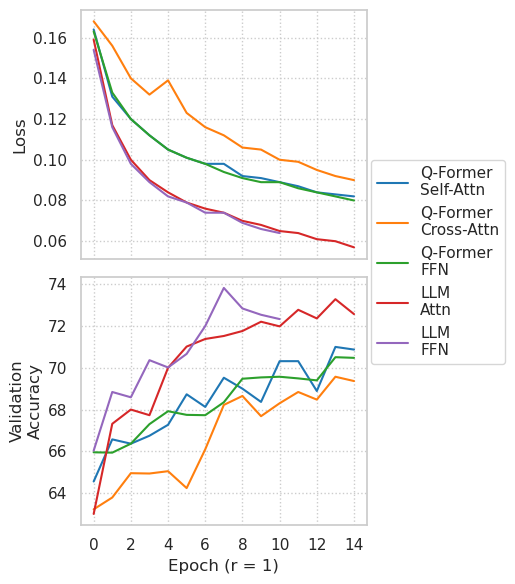

In [405]:
plt = plot_loss_acc_for_all_components(
    loss_df,
    val_acc_df, 
    # ['Q-Former\nSelf-Attn', 'Q-Former\nCross-Attn', 'Q-Former\nFFN', 'Q-Former\nAll'],
    # ['LLM\nAttn', 'LLM\nFFN', 'LLM\nAll'],
    ['Q-Former\nSelf-Attn', 'Q-Former\nCross-Attn', 'Q-Former\nFFN', 'LLM\nAttn', 'LLM\nFFN',],
    1
)
plt.savefig(f'{dataset}/{dataset}_loss_and_val_acc.pdf', bbox_inches='tight')
plt.show()

In [ ]:
def plot_loss_acc_for_all_r(loss_df, acc_df, row_id):
    component = loss_df.at[row_id,'method'].replace("\n", " ")
    loss_r1 = ast.literal_eval(loss_df.at[row_id, "r = 1"])
    loss_r2 = ast.literal_eval(loss_df.at[row_id, "r = 2"])
    loss_r4 = ast.literal_eval(loss_df.at[row_id, "r = 4"])
    loss_r8 = ast.literal_eval(loss_df.at[row_id, "r = 8"])
    loss_r1_df = pd.DataFrame({'iter': range(len(loss_r1)), 'loss': loss_r1, 'rank':['1']*len(loss_r1)})
    loss_r2_df = pd.DataFrame({'iter': range(len(loss_r2)), 'loss': loss_r2, 'rank':['2']*len(loss_r2)})
    loss_r4_df = pd.DataFrame({'iter': range(len(loss_r4)), 'loss': loss_r4, 'rank':['4']*len(loss_r4)})
    loss_r8_df = pd.DataFrame({'iter': range(len(loss_r8)), 'loss': loss_r8, 'rank':['8']*len(loss_r8)})

    acc_r1 = ast.literal_eval(acc_df.at[row_id, "r = 1"])
    acc_r2 = ast.literal_eval(acc_df.at[row_id, "r = 2"])
    acc_r4 = ast.literal_eval(acc_df.at[row_id, "r = 4"])
    acc_r8 = ast.literal_eval(acc_df.at[row_id, "r = 8"])
    acc_r1_df = pd.DataFrame({'iter': range(len(acc_r1)), 'loss': acc_r1, 'rank':['1']*len(acc_r1)})
    acc_r2_df = pd.DataFrame({'iter': range(len(acc_r2)), 'loss': acc_r2, 'rank':['2']*len(acc_r2)})
    acc_r4_df = pd.DataFrame({'iter': range(len(acc_r4)), 'loss': acc_r4, 'rank':['4']*len(acc_r4)})
    acc_r8_df = pd.DataFrame({'iter': range(len(acc_r8)), 'loss': acc_r8, 'rank':['8']*len(acc_r8)})
    
    loss_data = pd.concat([
        loss_r1_df,
        loss_r2_df,
        loss_r4_df,
        loss_r8_df
        ], axis=0)
    acc_data = pd.concat([
        acc_r1_df,
        acc_r2_df,
        acc_r4_df,
        acc_r8_df
        ], axis=0)

    fig, axes = plt.subplots(2, 1, figsize=(4, 6))
    sns.lineplot(data=loss_data, x='iter', y="loss", hue="rank", ax=axes[0])
    axes[0].set_xlabel('')
    axes[0].xaxis.set_ticks(list(range(0,15,2)))
    axes[0].tick_params(labelbottom=False)
    axes[0].set_ylabel('Loss')
    # axes[0].get_legend().remove()

    sns.lineplot(data=acc_data, x='iter', y="loss", hue="rank", ax=axes[1])
    axes[1].legend(title='Component')
    axes[1].xaxis.set_ticks(list(range(0,15,2)))
    axes[1].set_xlabel(f'Epoch\n({component})')
    axes[1].set_ylabel('Validation\nAccuracy')
    axes[1].get_legend().remove()

    plt.tight_layout()

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

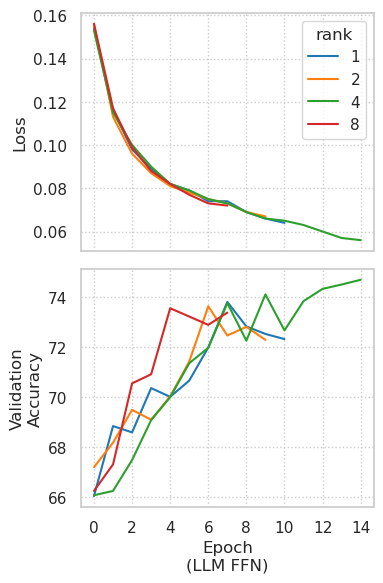

In [ ]:
plot_loss_acc_for_all_r(loss_df, val_acc_df, 0)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

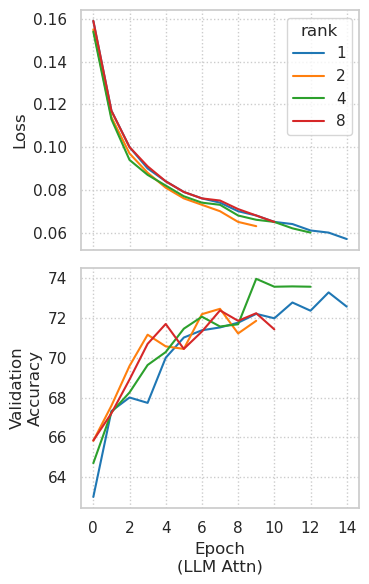

In [ ]:
plot_loss_acc_for_all_r(loss_df, val_acc_df, 1)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

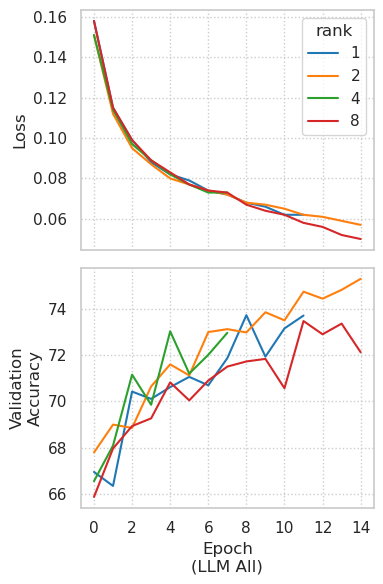

In [ ]:
plot_loss_acc_for_all_r(loss_df, val_acc_df, 2)

## Val Acc

In [ ]:
df = pd.read_csv(f'{dataset}/val_acc_per_epoch.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,Q-Former\nSelf-Attn,"[75.72722937529804, 76.5855984740105, 79.30376...","[75.72722937529804, 76.5855984740105, 79.30376...","[72.1030042918455, 73.29518359561278, 74.96423...","[75.72722937529804, 76.5855984740105, 79.30376..."
5,Q-Former\nCross-Attn,"[73.86742966142108, 76.34716261325704, 79.1607...","[72.48450166905103, 73.86742966142108, 74.5827...","[73.86742966142108, 76.34716261325704, 79.1607...","[73.86742966142108, 76.34716261325704, 79.1607..."
3,Q-Former\nFFN,"[75.20267048164044, 76.15641392465426, 77.9208...","[75.20267048164044, 76.15641392465426, 77.9208...","[75.20267048164044, 76.15641392465426, 77.9208...","[75.20267048164044, 76.15641392465426, 77.9208..."
6,Q-Former\nAll,"[74.05817835002384, 75.29804482594183, 78.0639...","[74.05817835002384, 75.29804482594183, 78.0639...","[74.05817835002384, 75.29804482594183, 78.0639...","[74.05817835002384, 75.29804482594183, 78.0639..."
1,LLM\nAttn,"[74.86886027658561, 78.1592751549833, 80.35288...","[76.68097281831187, 78.87458273724368, 81.5927...","[75.15498330948974, 78.63614687649022, 80.1621...","[75.72722937529804, 77.25321888412017, 80.8774..."
0,LLM\nFFN,"[75.48879351454458, 77.49165474487363, 78.9699...","[74.72579876013353, 78.01621363853124, 81.5927...","[76.82403433476395, 79.3514544587506, 81.73581...","[73.43824511206486, 77.53934191702432, 80.3051..."
2,LLM\nAll,"[74.43967572722937, 76.39484978540773, 81.0205...","[75.20267048164044, 78.30233667143538, 80.8297...","[76.82403433476395, 77.44396757272294, 80.4005...","[73.48593228421555, 76.5855984740105, 80.11444..."
7,Q-Former\nand LLM\nAll,"[77.30090605627086, 79.39914163090128, 80.2575...","[77.73009060562708, 80.35288507391512, 79.4468...","[76.5379113018598, 79.3514544587506, 81.115879...","[77.01478302336672, 79.01764425369575, 80.5436..."
16,Q-Former\nSelf-Attn QVO,"[72.0553171196948, 77.0624701955174, 78.063900...","[72.0553171196948, 77.0624701955174, 78.063900...","[71.81688125894135, 72.91368621840725, 74.8688...","[72.0553171196948, 77.0624701955174, 78.063900..."
17,Q-Former\nCross-Attn QVO,"[73.86742966142108, 76.34716261325704, 79.1607...","[72.48450166905103, 73.86742966142108, 74.5827...","[73.86742966142108, 76.34716261325704, 79.1607...","[73.86742966142108, 76.34716261325704, 79.1607..."


In [ ]:
from scipy import interpolate, ndimage


def plot_loss_for_all_components(sub_df, methods, rank, window_size):
    df_list = []

    # methods = list(sub_df['method'])

    for method in methods:
        loss_hist = ast.literal_eval(sub_df.loc[sub_df['method'] == method, f"r = {rank}"].tolist()[0])
        loss_df = pd.DataFrame({'iter': range(len(loss_hist)), 'loss': loss_hist, 'method':[f'{method}']*len(loss_hist)})
        df_list.append(loss_df)

    data = pd.concat(df_list, axis=0)

    sns.lineplot(data=data, x='iter', y="loss", hue="method")
    plt.legend(title='Component')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')

    plt.title(f'r = {rank}')

def plot_loss_for_all_r(sub_df, row_id):
    loss_r1 = ast.literal_eval(sub_df.at[row_id, "r = 1"])
    loss_r2 = ast.literal_eval(sub_df.at[row_id, "r = 2"])
    loss_r4 = ast.literal_eval(sub_df.at[row_id, "r = 4"])
    loss_r8 = ast.literal_eval(sub_df.at[row_id, "r = 8"])

    smooth_r1_df = pd.DataFrame({'iter': range(len(loss_r1)), 'loss': loss_r1, 'rank':['1']*len(loss_r1)})
    smooth_r2_df = pd.DataFrame({'iter': range(len(loss_r2)), 'loss': loss_r2, 'rank':['2']*len(loss_r2)})
    smooth_r4_df = pd.DataFrame({'iter': range(len(loss_r4)), 'loss': loss_r4, 'rank':['4']*len(loss_r4)})
    smooth_r8_df = pd.DataFrame({'iter': range(len(loss_r8)), 'loss': loss_r8, 'rank':['8']*len(loss_r8)})

    data = pd.concat([
        smooth_r1_df,
        smooth_r2_df,
        smooth_r4_df,
        smooth_r8_df
        ], axis=0)

    sns.lineplot(data=data, x='iter', y="loss", hue="rank")

    method = sub_df.at[row_id, 'method']
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')

    plt.title(f'{method}')

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

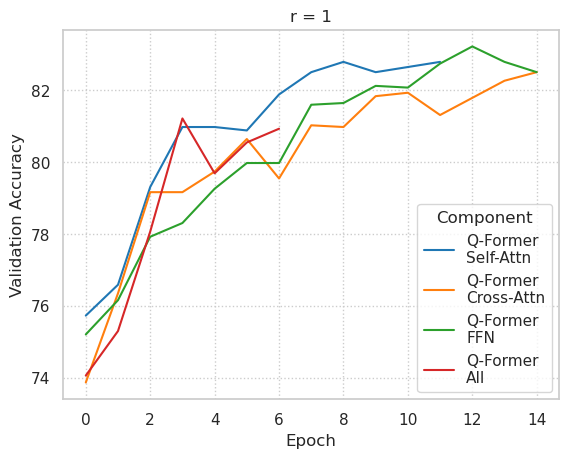

In [ ]:
plot_loss_for_all_components(
    sub_df, 
    ['Q-Former\nSelf-Attn', 'Q-Former\nCross-Attn', 'Q-Former\nFFN', 'Q-Former\nAll'],
    1, 33)

/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/rescue/anaconda3/envs/neon/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

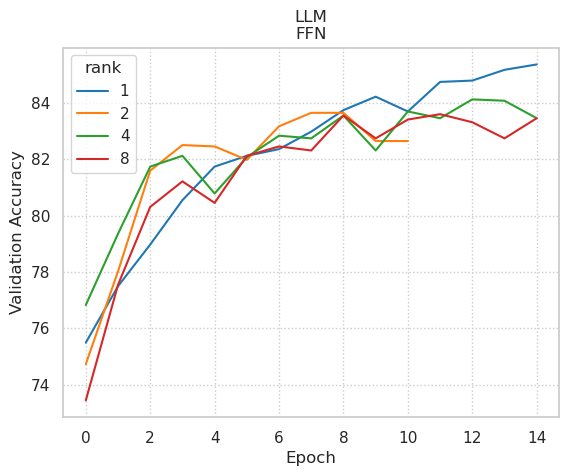

In [ ]:
plot_loss_for_all_r(sub_df, 0)

# Test accuracy

In [ ]:
df = pd.read_csv(f'{dataset}/test_accuracy.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,"Q-Former LoRA (self-attn, FlanT5-XL)",0.722293,0.722293,0.722293,0.722293
5,"Q-Former LoRA (cross-attn, FlanT5-XL)",0.704085,0.704085,0.704085,0.704085
3,"Q-Former LoRA (ffn, FlanT5-XL)",0.714693,0.707093,0.680494,0.707093
6,"Q-Former LoRA (all, FlanT5-XL)",0.709310,0.672419,0.709310,0.709310
1,"LLM LoRA (attn, FlanT5-XL)",0.747625,0.729101,0.743509,0.727834
0,"LLM LoRA (ffn, FlanT5-XL)",0.742717,0.739234,0.753167,0.729417
2,"LLM LoRA (all, FlanT5-XL)",0.745408,0.757283,0.730684,0.738442
7,"Q-Former and LLM LoRA (all, FlanT5-XL)",0.729259,0.717543,0.711051,0.720868


In [ ]:
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,Q-Former\nSelf-Attn,0.722293,0.722293,0.722293,0.722293
5,Q-Former\nCross-Attn,0.704085,0.704085,0.704085,0.704085
3,Q-Former\nFFN,0.714693,0.707093,0.680494,0.707093
6,Q-Former\nAll,0.709310,0.672419,0.709310,0.709310
1,LLM\nAttn,0.747625,0.729101,0.743509,0.727834
0,LLM\nFFN,0.742717,0.739234,0.753167,0.729417
2,LLM\nAll,0.745408,0.757283,0.730684,0.738442
7,Q-Former\nand LLM\nAll,0.729259,0.717543,0.711051,0.720868


In [ ]:
# reshape T5 results
t5_df = pd.melt(sub_df, id_vars=['method'], var_name='rank', value_name='score')
t5_df['rank'] = t5_df['rank'].transform(lambda x: int(x.split(" ")[-1]))
t5_df['score'] = t5_df['score']*100
t5_df

,method,rank,score
0,Q-Former\nSelf-Attn,1,72.229259
1,Q-Former\nCross-Attn,1,70.408486
2,Q-Former\nFFN,1,71.469284
3,Q-Former\nAll,1,70.930969
4,LLM\nAttn,1,74.762508
5,LLM\nFFN,1,74.271691
6,LLM\nAll,1,74.540849
7,Q-Former\nand LLM\nAll,1,72.925902
8,Q-Former\nSelf-Attn,2,72.229259
9,Q-Former\nCross-Attn,2,70.408486


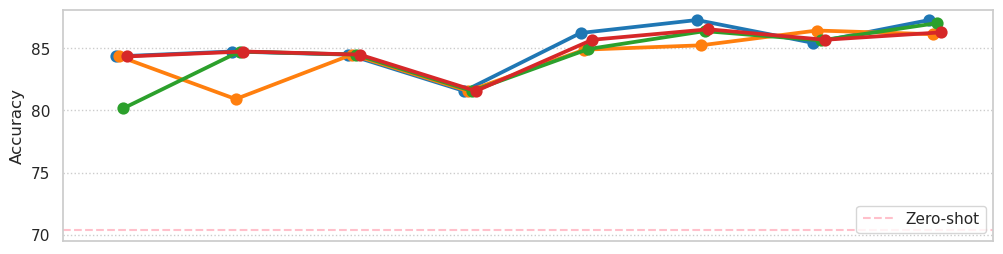

In [ ]:
import matplotlib.lines as mlines

ax = sns.pointplot(
    data = t5_df, 
    # y = 'method', x = 'score', 
    x = 'method', y = 'score', 
    hue="rank", 
    dodge=True
)
# plt.axvline(x=70.4, color='pink', linestyle='--')
plt.axhline(y=70.4, color='pink', linestyle='--')

# remove y ticks
ax.xaxis.set_ticks([])

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Manually add the line to the legend
legend_elements = [mlines.Line2D([], [], color='pink', linestyle='--', label='Zero-shot')]
# plt.legend(handles=handles + legend_elements, labels=labels + ['Zero-shot'], loc='best')
plt.legend(handles=legend_elements, labels=['Zero-shot'], loc='lower right')

plt.xlabel('')
plt.ylabel('Accuracy')

# Adding title
title = 'Test Accuracy'
# plt.title('Test Accuracy')

plt.gcf().set_size_inches(12, 3)
plt.savefig(f'{title}.png', bbox_inches='tight')
plt.show()


# Time

## Total training time

In [ ]:
df = pd.read_csv('training_time.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,"Q-Former LoRA (self-attn, FlanT5-XL)",2.804167,2.840833,2.611944,2.830278
5,"Q-Former LoRA (cross-attn, FlanT5-XL)",3.443611,3.438889,3.451389,3.432500
3,"Q-Former LoRA (ffn, FlanT5-XL)",3.606667,3.638889,3.643056,3.634167
6,"Q-Former LoRA (all, FlanT5-XL)",1.813889,1.849444,1.848889,1.846667
1,"LLM LoRA (attn, FlanT5-XL)",2.425278,2.679722,2.674722,2.923889
0,"LLM LoRA (ffn, FlanT5-XL)",3.658333,2.751944,3.770833,3.788611
2,"LLM LoRA (all, FlanT5-XL)",3.126389,3.912778,2.881111,3.175556
7,"Q-Former and LLM LoRA (all, FlanT5-XL)",3.884722,3.280278,4.500278,3.882778


In [ ]:
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,Q-Former (self-attn),2.804167,2.840833,2.611944,2.830278
5,Q-Former (cross-attn),3.443611,3.438889,3.451389,3.432500
3,Q-Former (ffn),3.606667,3.638889,3.643056,3.634167
6,Q-Former (all),1.813889,1.849444,1.848889,1.846667
1,LLM (attn),2.425278,2.679722,2.674722,2.923889
0,LLM (ffn),3.658333,2.751944,3.770833,3.788611
2,LLM (all),3.126389,3.912778,2.881111,3.175556
7,Q-Former and LLM (all),3.884722,3.280278,4.500278,3.882778


In [ ]:
# reshape T5 results
def time_str_to_float(time_str):
    tokens = time_str.split(':')
    hour = int(tokens[0])
    minute = int(tokens[1])
    second = int(tokens[2])

    return hour + minute/60

t5_df = pd.melt(sub_df, id_vars=['method'], var_name='rank', value_name='score')
t5_df['rank'] = t5_df['rank'].transform(lambda x: int(x.split(" ")[-1]))
# t5_df['score'] = t5_df['score'].transform(lambda x: time_str_to_float(x))
t5_df

,method,rank,score
0,Q-Former (self-attn),1,2.804167
1,Q-Former (cross-attn),1,3.443611
2,Q-Former (ffn),1,3.606667
3,Q-Former (all),1,1.813889
4,LLM (attn),1,2.425278
5,LLM (ffn),1,3.658333
6,LLM (all),1,3.126389
7,Q-Former and LLM (all),1,3.884722
8,Q-Former (self-attn),2,2.840833
9,Q-Former (cross-attn),2,3.438889


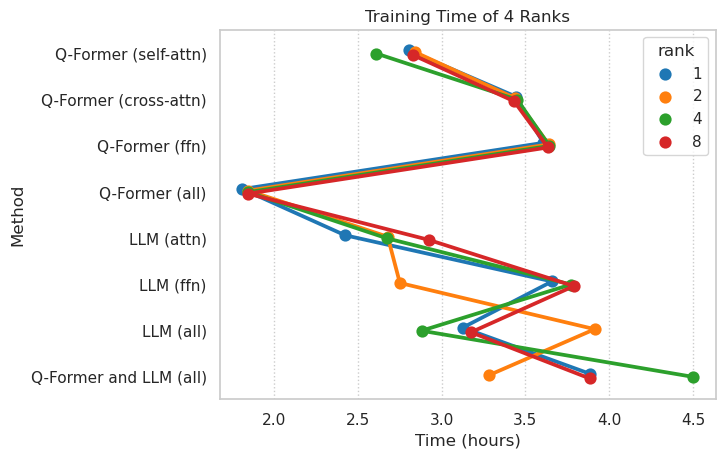

In [ ]:
sns.pointplot(
    data = t5_df, 
    y = 'method', x = 'score', 
    hue="rank", 
    dodge=True
)
plt.xlabel('Time (hours)')
plt.ylabel('Method')

# Adding title
plt.title('Training Time of 4 Ranks')
plt.show()

## time_per_it

In [ ]:
df = pd.read_csv('time_per_it.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,"Q-Former LoRA (self-attn, FlanT5-XL)",0.541683,0.548708,0.550345,0.546692
5,"Q-Former LoRA (cross-attn, FlanT5-XL)",0.532133,0.531407,0.533367,0.530473
3,"Q-Former LoRA (ffn, FlanT5-XL)",0.557320,0.562367,0.562940,0.561567
6,"Q-Former LoRA (all, FlanT5-XL)",0.600543,0.612486,0.612314,0.611457
1,"LLM LoRA (attn, FlanT5-XL)",0.562190,0.564655,0.563664,0.564733
0,"LLM LoRA (ffn, FlanT5-XL)",0.565313,0.579909,0.582727,0.585480
2,"LLM LoRA (all, FlanT5-XL)",0.603858,0.604720,0.607045,0.613300
7,"Q-Former and LLM LoRA (all, FlanT5-XL)",0.692585,0.691209,0.695280,0.692246


In [ ]:
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,Q-Former\n(self-attn),0.541683,0.548708,0.550345,0.546692
5,Q-Former\n(cross-attn),0.532133,0.531407,0.533367,0.530473
3,Q-Former\n(ffn),0.557320,0.562367,0.562940,0.561567
6,Q-Former\n(all),0.600543,0.612486,0.612314,0.611457
1,LLM\n(attn),0.562190,0.564655,0.563664,0.564733
0,LLM\n(ffn),0.565313,0.579909,0.582727,0.585480
2,LLM\n(all),0.603858,0.604720,0.607045,0.613300
7,Q-Former and LLM\n(all),0.692585,0.691209,0.695280,0.692246


In [ ]:
# reshape T5 results
t5_df = pd.melt(sub_df, id_vars=['method'], var_name='rank', value_name='score')
t5_df['rank'] = t5_df['rank'].transform(lambda x: int(x.split(" ")[-1]))
t5_df

,method,rank,score
0,Q-Former\n(self-attn),1,0.541683
1,Q-Former\n(cross-attn),1,0.532133
2,Q-Former\n(ffn),1,0.557320
3,Q-Former\n(all),1,0.600543
4,LLM\n(attn),1,0.562190
5,LLM\n(ffn),1,0.565313
6,LLM\n(all),1,0.603858
7,Q-Former and LLM\n(all),1,0.692585
8,Q-Former\n(self-attn),2,0.548708
9,Q-Former\n(cross-attn),2,0.531407


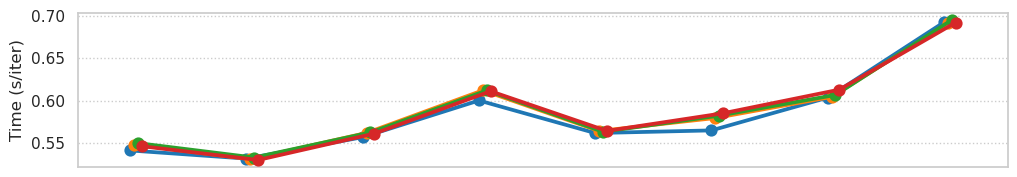

In [ ]:
ax = sns.pointplot(
    data = t5_df, 
    # y = 'method', x = 'score', 
    x = 'method', y = 'score', 
    hue="rank", 
    dodge=True,
)

plt.xlabel('')
plt.ylabel('Time (s/iter)')

plt.gca().legend().remove()
ax.xaxis.set_ticks([])

# Adding title
title = 'Mean Training Time per Iteration'
# plt.title(title)

plt.gcf().set_size_inches(12, 2)
plt.savefig(f'{title}.png', bbox_inches='tight')
plt.show()

# Param Count

In [ ]:
df = pd.read_csv('trainable_params.csv')
df = df.rename(columns = {'Unnamed: 0': 'method'})
df
# take only T5 results
sub_df = df[df['method'].str.endswith('FlanT5-XL)')]
# sort methods by param count ascending
sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,"Q-Former LoRA (self-attn, FlanT5-XL)",36864,73728,147456,294912
5,"Q-Former LoRA (cross-attn, FlanT5-XL)",44544,89088,178176,356352
3,"Q-Former LoRA (ffn, FlanT5-XL)",184320,368640,737280,1474560
6,"Q-Former LoRA (all, FlanT5-XL)",265728,531456,1062912,2125824
1,"LLM LoRA (attn, FlanT5-XL)",589824,1179648,2359296,4718592
0,"LLM LoRA (ffn, FlanT5-XL)",1032192,2064384,4128768,8257536
2,"LLM LoRA (all, FlanT5-XL)",1622016,3244032,6488064,12976128
7,"Q-Former and LLM LoRA (all, FlanT5-XL)",1887744,3775488,7550976,15101952


In [ ]:
# rename methods
sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
sub_df

,method,r = 1,r = 2,r = 4,r = 8
4,Q-Former\n(self-attn),36864,73728,147456,294912
5,Q-Former\n(cross-attn),44544,89088,178176,356352
3,Q-Former\n(ffn),184320,368640,737280,1474560
6,Q-Former\n(all),265728,531456,1062912,2125824
1,LLM\n(attn),589824,1179648,2359296,4718592
0,LLM\n(ffn),1032192,2064384,4128768,8257536
2,LLM\n(all),1622016,3244032,6488064,12976128
7,Q-Former and LLM\n(all),1887744,3775488,7550976,15101952


In [ ]:
# reshape T5 results
t5_df = pd.melt(sub_df, id_vars=['method'], var_name='rank', value_name='score')
t5_df['rank'] = t5_df['rank'].transform(lambda x: int(x.split(" ")[-1]))
t5_df

,method,rank,score
0,Q-Former\n(self-attn),1,36864
1,Q-Former\n(cross-attn),1,44544
2,Q-Former\n(ffn),1,184320
3,Q-Former\n(all),1,265728
4,LLM\n(attn),1,589824
5,LLM\n(ffn),1,1032192
6,LLM\n(all),1,1622016
7,Q-Former and LLM\n(all),1,1887744
8,Q-Former\n(self-attn),2,73728
9,Q-Former\n(cross-attn),2,89088


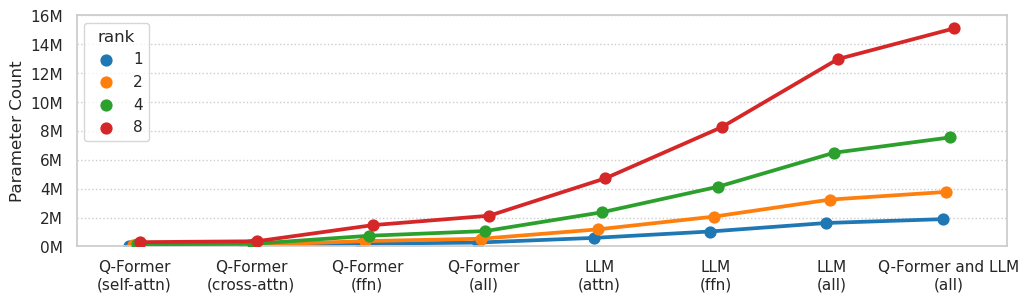

In [ ]:
ax = sns.pointplot(
    data = t5_df, 
    # y = 'method', x = 'score', 
    x = 'method', y = 'score', 
    hue="rank", 
    dodge=True
)
ax.set_ylim(0, None)

plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(x/1e6)}M' for x in plt.yticks()[0]])
# ax.set_xscale('log')

plt.xlabel('')
plt.ylabel('Parameter Count')

# Adding title
title = 'Trainable Parameter Count'
# plt.title(title)

plt.gcf().set_size_inches(12, 3)
plt.savefig(f'{title}.png', bbox_inches='tight')
plt.show()

# Plot side by side

In [ ]:
row_order

['Q-Former LoRA (cross-attn, FlanT5-XL)',
 'Q-Former LoRA (self-attn, FlanT5-XL)',
 'Q-Former LoRA (ffn, FlanT5-XL)',
 'Q-Former LoRA (all, FlanT5-XL)',
 'LLM LoRA (attn, FlanT5-XL)',
 'LLM LoRA (ffn, FlanT5-XL)',
 'LLM LoRA (all, FlanT5-XL)',
 'Q-Former and LLM LoRA (all, FlanT5-XL)']

In [ ]:
def process_df(df):
    df = df.rename(columns = {'Unnamed: 0': 'method'})
    # take only T5 results
    sub_df = df[df['method'].isin(row_order)]
    # sort methods by param count ascending
    sub_df = sub_df.sort_values(by='method', key=lambda x: x.map(custom_sort_value))
    # rename methods
    sub_df['method'] = sub_df['method'].transform(lambda x: rename_method(x))
    # reshape T5 results
    t5_df = pd.melt(sub_df, id_vars=['method'], var_name='rank', value_name='score')
    t5_df['rank'] = t5_df['rank'].transform(lambda x: int(x.split(" ")[-1]))
    t5_df['score'] = t5_df['score']

    return t5_df

In [ ]:
test_accuracy_df = process_df(pd.read_csv(f'{dataset}/test_accuracy.csv'))
test_accuracy_df['score'] = test_accuracy_df['score']*100

time_per_it_df = process_df(pd.read_csv(f'{dataset}/time_per_it.csv'))

trainable_params_df = process_df(pd.read_csv(f'{dataset}/trainable_params.csv'))

In [ ]:
test_accuracy_df

,method,rank,score
0,Q-Former\nCross-Attn,1,84.729797
1,Q-Former\nSelf-Attn,1,84.333168
2,Q-Former\nFFN,1,84.481904
3,Q-Former\nAll,1,81.556767
4,LLM\nAttn,1,86.217154
5,LLM\nFFN,1,87.258304
6,LLM\nAll,1,85.423897
7,Q-Former\nand LLM\nAll,1,87.258304
8,Q-Former\nCross-Attn,2,80.912246
9,Q-Former\nSelf-Attn,2,84.333168


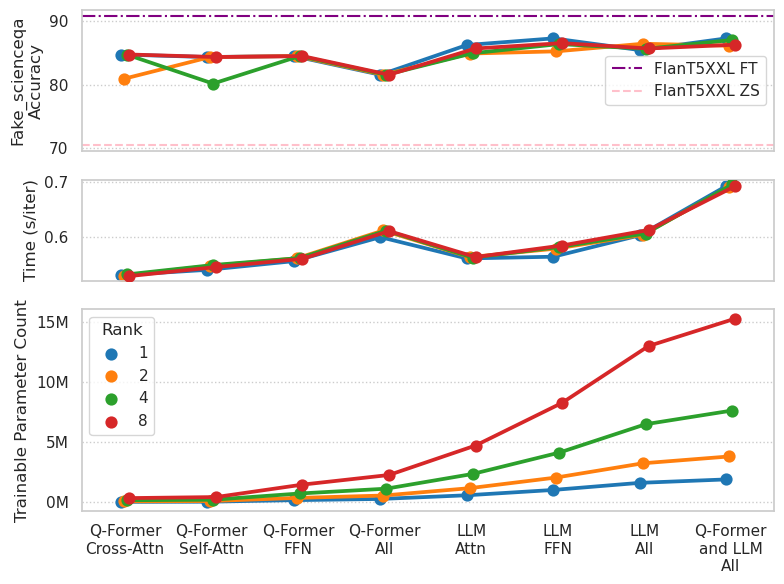

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Create a figure and axis objects
fig, axes = plt.subplots(3, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [0.7, 0.5, 1]})

# Plot first pointplot
sns.pointplot(data=test_accuracy_df, x="method", y="score", hue="rank", dodge=True, ax=axes[0])
axes[0].xaxis.set_ticks([])
axes[0].set_xlabel('')
dataset_display = dataset.replace('qa', 'QA').capitalize()
axes[0].set_ylabel(f'{dataset_display}\nAccuracy')
if 'scienceqa' in dataset:
    axes[0].axhline(y=70.6, color='pink', linestyle='--', label='XXL ZS')
    axes[0].axhline(y=90.7, color='purple', linestyle='dashdot', label='XXL FT')
    zs_elements = [
        mlines.Line2D([], [], color='purple', linestyle='dashdot', label='FlanT5XXL FT'),
        mlines.Line2D([], [], color='pink', linestyle='--', label='FlanT5XXL ZS')
    ]
    axes[0].legend(handles=zs_elements, loc='center right')
elif 'iconqa' in dataset:
    axes[0].axhline(y=51.2, color='pink', linestyle='--', label='XXL ZS')
    zs_elements = [
        mlines.Line2D([], [], color='pink', linestyle='--', label='FlanT5XXL ZS')
    ]
    axes[0].legend(handles=zs_elements, loc='center right')



# Plot second pointplot
sns.pointplot(data=time_per_it_df, x="method", y="score", hue="rank", dodge=True, ax=axes[1])
axes[1].xaxis.set_ticks([])
axes[1].set_xlabel('')
axes[1].set_ylabel('Time (s/iter)')
axes[1].get_legend().remove()

# Plot third pointplot
sns.pointplot(data=trainable_params_df, x="method", y="score", hue="rank", dodge=True, ax=axes[2])
axes[2].set_xlabel('')
# axes[2].yticks(ticks=axes[2].yticks()[0], labels=[f'{int(x/1e6)}M' for x in axes[2].yticks()[0]])
def millions_formatter(x, pos):
    return '%1.0fM' % (x * 1e-6)
axes[2].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[2].set_ylabel('Trainable Parameter Count')
axes[2].legend(title='Rank')

# Adjust layout
plt.tight_layout()

# plt.savefig(f'{dataset}/{dataset}_3-in-1.pdf', bbox_inches='tight')

# Show plot
plt.show()


# Accuracy vs Params

In [ ]:
iconqa_test_accuracy_df = process_df(pd.read_csv(f'iconqa/test_accuracy.csv'))
iconqa_test_accuracy_df['score'] = iconqa_test_accuracy_df['score']*100
iconqa_trainable_params_df = process_df(pd.read_csv(f'{dataset}/trainable_params.csv'))

In [ ]:
iconqa_df = iconqa_test_accuracy_df.merge(iconqa_trainable_params_df, on=['method', 'rank']).rename(columns={
    'score_x': 'IconQA Accuracy',
    'score_y': 'Trainable Parameter Count',
    'method': 'Component',
    'rank': 'Rank',
})

iconqa_df.head(4)

print(min(iconqa_df['IconQA Accuracy']), max(iconqa_df['IconQA Accuracy']))

67.2419252691577 75.72830905636478


In [ ]:
scienceqa_test_accuracy_df = process_df(pd.read_csv(f'scienceqa/test_accuracy.csv'))
scienceqa_test_accuracy_df['score'] = scienceqa_test_accuracy_df['score']*100
scienceqa_trainable_params_df = process_df(pd.read_csv(f'{dataset}/trainable_params.csv'))

In [ ]:
science_df = scienceqa_test_accuracy_df.merge(scienceqa_trainable_params_df, on=['method', 'rank']).rename(columns={
    'score_x': 'ScienceQA Accuracy',
    'score_y': 'Trainable Parameter Count',
    'method': 'Component',
    'rank': 'Rank',
})

science_df.head(4)

print(min(science_df['ScienceQA Accuracy']), max(science_df['ScienceQA Accuracy']))

80.16856717897868 87.2583044124938


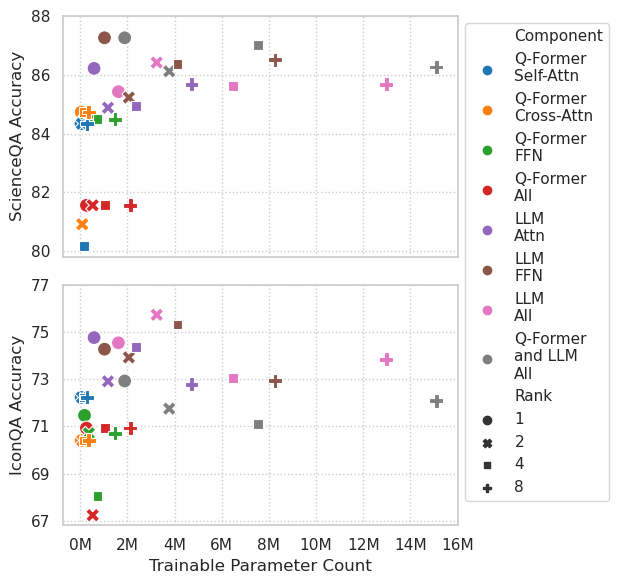

In [ ]:
def millions_formatter(x, pos):
    return '%1.0fM' % (x * 1e-6)

fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# Plot first
sns.scatterplot(
    ax=axes[0],
    data=science_df, 
    x="Trainable Parameter Count", y="ScienceQA Accuracy", 
    hue="Component", style="Rank",
    s=100)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks([0, 2*1e6, 4*1e6, 6*1e6, 8*1e6, 10*1e6, 12*1e6, 14*1e6, 16*1e6])
axes[0].yaxis.set_ticks(range(80, 90, 2))
axes[0].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[0].tick_params(
    axis='x', which='both', 
    labelbottom=False, 
    bottom=False, top=False, left=False, right=False,
    labelcolor='#ffffff',
    labelsize= 0.01
)
axes[0].grid(axis='x', linestyle='dotted')
axes[0].get_legend().remove()

# Plot second
sns.scatterplot(
    ax=axes[1],
    data=iconqa_df, 
    x="Trainable Parameter Count", y="IconQA Accuracy", 
    hue="Component", style="Rank",
    s=100)
axes[1].xaxis.set_ticks([0, 2*1e6, 4*1e6, 6*1e6, 8*1e6, 10*1e6, 12*1e6, 14*1e6, 16*1e6])
axes[1].yaxis.set_ticks(range(67, 78, 2))
axes[1].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[1].get_legend().remove()

# add legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.25, .55))

plt.tight_layout()

plt.savefig(f'accuracy_vs_params.pdf', bbox_inches='tight')

plt.show()